In [1]:
import pandas as pd
import matplotlib.pyplot as plt

TSLA_data=pd.read_csv("../data/tesla_data.csv")
TSLA_data.drop(columns={'Price'},index=0,axis=0,inplace=True)
TSLA_data['Date']=pd.to_datetime(TSLA_data['Date'])
TSLA_data['Close'] = pd.to_numeric(TSLA_data['Close'], errors='coerce')
TSLA_data.set_index('Date',inplace=True)
TSLA_data.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2015-01-02,14.620667457580566,14.620667,14.883333206176758,14.21733283996582,14.857999801635742,71466000
2015-01-05,14.005999565124512,14.006000,14.433333396911621,13.810667037963867,14.303333282470703,80527500
2015-01-06,14.085332870483398,14.085333,14.279999732971191,13.61400032043457,14.003999710083008,93928500
2015-01-07,14.063332557678223,14.063333,14.3186674118042,13.985333442687988,14.223333358764648,44526000
2015-01-08,14.041333198547363,14.041333,14.25333309173584,14.000666618347168,14.187333106994629,51637500


In [10]:
from statsmodels.tsa.stattools import adfuller
import seaborn as sns

def check_stationarity(df,col):
    df["rollingMean"]=df[col].rolling(window=21).mean()
    df["rollingStd"]=df[col].rolling(window=21).std()
    result=adfuller(df[col],autolag="AIC")
    
    print(f"Test Statistics: {result[0]}")
    print(f"p-Value: {result[1]}")
    print(f"Lag used: {result[2]}")
    print(f"Number of observation: {result[2]}")
    print(f"Critical Values': {result[4]}")
    print(f"Conclusion: {'Stationary' if result[1] < 0.05 else 'Non-Stationary'}")
    
    plt.figure(figsize=(10,5))
    sns.lineplot(df,x=df.index,y=df[col],label='Closing Price')
    sns.lineplot(df,x=df.index,y=df["rollingMean"],label="RollingMean")
    sns.lineplot(df,x=df.index,y=df["rollingStd"],label="RollingStd")
    plt.legend()
    
# check_stationarity(TSLA_data,'Close')

In [11]:
TSLA_data['Firstdiff']=TSLA_data['Close'].diff()

C:\Users\HP\AppData\Local\Temp\ipykernel_17020\32142924.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rollingMean"]=df[col].rolling(window=21).mean()
C:\Users\HP\AppData\Local\Temp\ipykernel_17020\32142924.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rollingStd"]=df[col].rolling(window=21).std()


Test Statistics: -9.53571982887432
p-Value: 2.812366323818195e-16
Lag used: 27
Number of observation: 27
Critical Values': {'1%': np.float64(-3.433327239607306), '5%': np.float64(-2.8628552495229194), '10%': np.float64(-2.5674701716229276)}
Conclusion: Stationary


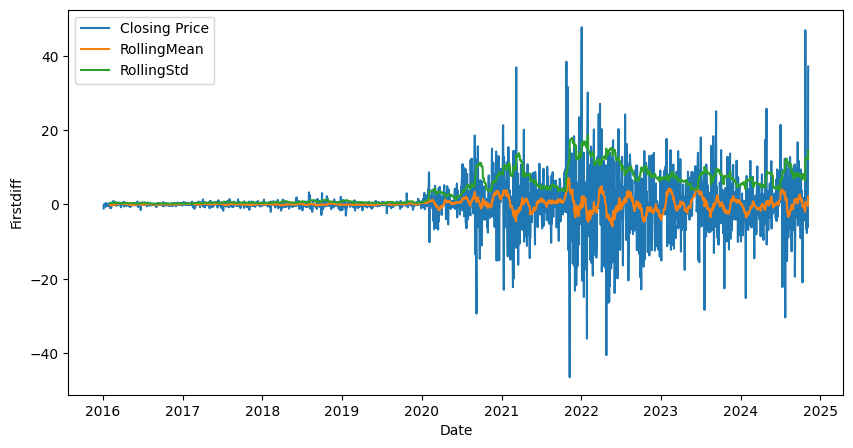

In [12]:
check_stationarity(TSLA_data.dropna(),'Firstdiff')